In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [3]:
sheet_id = '1quM2SQCyXHGd5zPc3y46FYjql_VoOQUqqwRtF9Ws0Xg'
sheet_name = 'Novembro'
url = f'https://docs.google.com/spreadsheet/ccc?key={sheet_id}&output=xlsx'
df = pd.read_excel(url, sheet_name=sheet_name, header=2).iloc[3:, 10:14]
df.head()

,Data,Valor,Descrição,Categoria
3,2023-11-03,17.20,99POP,Transporte
4,2023-11-03,188.92,CCG,Saúde
5,2023-11-03,280.00,Psicólogo,Saúde
6,2023-11-04,22.80,Café,Alimentação
7,2023-11-04,26.90,Café,Alimentação


In [4]:
df.dtypes

Data         datetime64[ns]
Valor               float64
Descrição            object
Categoria            object
dtype: object

In [17]:
total_categoria = df[['Valor', 'Categoria']].groupby('Categoria').sum()
total_categoria = total_categoria.sort_values('Valor', ascending=False)
total_categoria

,Valor
Categoria,
Alimentação,942.38
Transporte,618.36
Saúde,520.91
Pessoal,484.44
Outros,201.62
Presentes,169.90
Internet,99.99


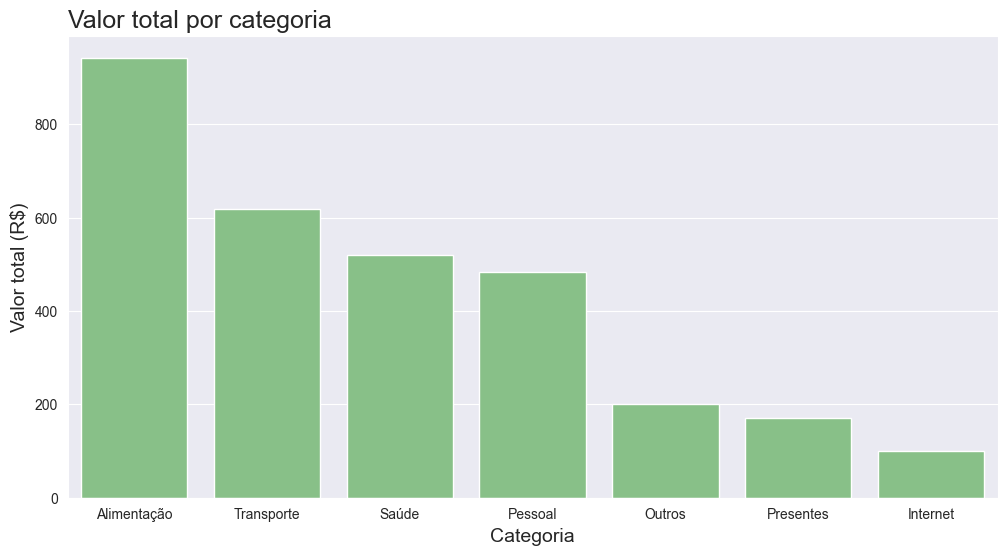

In [21]:
ax = sns.barplot(data = total_categoria, x = 'Categoria', y = 'Valor')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor total por categoria', loc='left', fontsize=18)
ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Valor total (R$)', fontsize=14)
plt.show()

In [23]:
print('Valor médio para gastos usuais:')
media_categora = df[['Valor', 'Descrição']].groupby('Descrição').mean()
media_categora.loc[['Almoço', '99POP', 'Café', 'Jantar', 'Uber']]

Valor médio para gastos usuais:


,Valor
Descrição,
Almoço,42.179091
99POP,14.968750
Café,18.162857
Jantar,24.670000
Uber,23.662000
